# Exercises in Clustering

In [47]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import silhouette_score

## Exercise 1

In this exercise, we will use a bike sharing dataset. The dataset contains coordinates of bike sharing stations in New York given as longitude and latitude values.

The dataset is am example dataset from the book ["Introduction to R for Business Intelligence"](https://jgendron.github.io/com.packtpub.intro.r.bi/), Packt Publishing Ltd., 2016, by Jay Gendron. The dataset is downloadable from Github [here](https://github.com/jgendron/com.packtpub.intro.r.bi/tree/master/Chapter5-ClusteringAnalysis/data), but is also available on Moodle as "Ch5_bike_station_locations.csv".

Answer the following questions:
1. Apply K-Means clustering to the dataset. Try out different values for K and use the Elbow method to find the best (or a sensible) K.
2. Visualize the K-Means clustering result for the best K.
3. Apply Agglomerative clustering to the dataset. Draw the Dendrogram and use it to find the best (or a sensible) number of clusters.
4. Generate this number of clusters with Agglomerative clustering and visualize the clustering.
5. Apply DBSCAN clustering to the dataset. Try out different values for "eps" and "min_samples" and choose the best values. (Hint: For "eps" you probably have to try out values around 0.01.)
6. Visual the final DBSCAN clustering you decided upon in 5.
7. Calculate the Silhouette scores for the three different "best clustering" you found with the three different methods. Also use Adjusted Rand Index to compare the best ones to each other.

1. Apply K-Means clustering to the dataset. Try out different values for K and use the Elbow method to find the best (or a sensible) K.

In [48]:
X = pd.read_csv("Ch5_bike_station_locations.csv")
X.head()

,latitude,longitude
0,38.956590,-76.993437
1,38.905218,-77.001496
2,38.980858,-77.054722
3,38.902925,-76.929915
4,38.949498,-77.093620


C:\Users\Jacob\AppData\Local\Temp\ipykernel_17032\2567612733.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data = X, x = "latitude", y = "longitude", palette="deep")


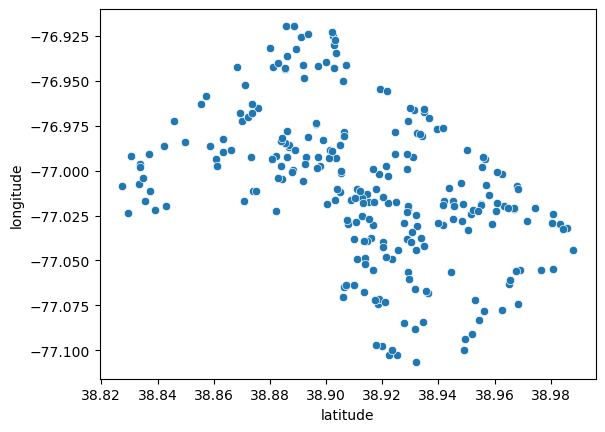

In [49]:
sns.scatterplot(data = X, x = "latitude", y = "longitude", palette="deep")
plt.show()

In [50]:
minMaxScaler = MinMaxScaler()
X_scaled_mm = pd.DataFrame(minMaxScaler.fit_transform(X), columns=X.columns)

In [51]:
errors = []
K = range(1, 20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_scaled_mm)
    errors.append(kmeanModel.inertia_)

c:\Users\Jacob\miniconda3\envs\dat\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Jacob\miniconda3\envs\dat\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Jacob\miniconda3\envs\dat\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Jacob\miniconda3\envs\dat\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans 

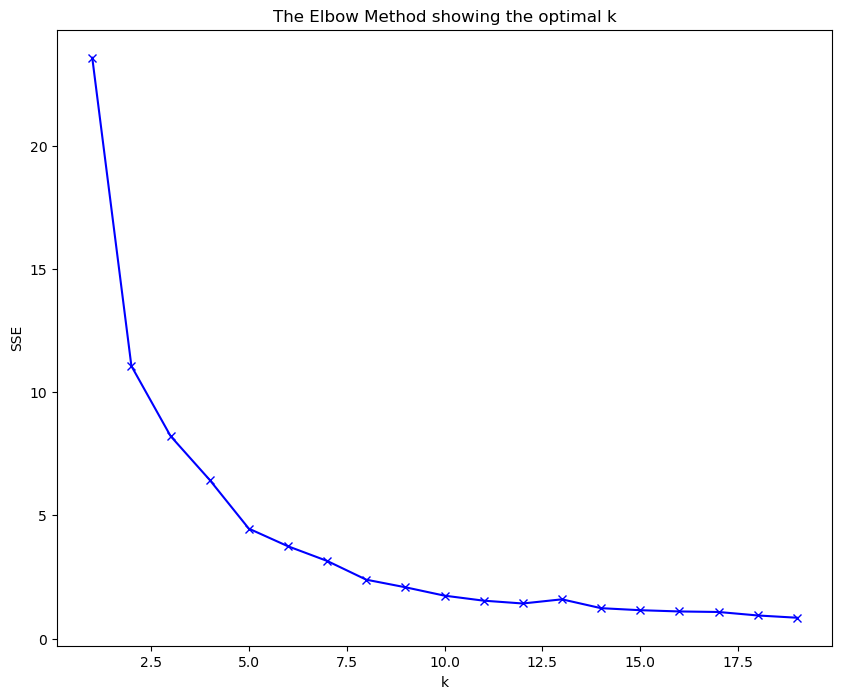

In [52]:
plt.figure(figsize=(10, 8))
plt.plot(K, errors, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [53]:
for i in range(1, len(errors)):
    print('K={0}: {1}'.format(i+1, errors[i-1] - errors[i]))

K=2: 12.502990600072305
K=3: 2.8401563821303597
K=4: 1.7794270398374996
K=5: 1.9758410995024294
K=6: 0.7149638817198194
K=7: 0.594869226539744
K=8: 0.7607697987963338
K=9: 0.3079622392138237
K=10: 0.34028732549212926
K=11: 0.20296541839222204
K=12: 0.11441079576176127
K=13: -0.16899224118663803
K=14: 0.35936605498239294
K=15: 0.08198210903762893
K=16: 0.05069852486407034
K=17: 0.021811759167641
K=18: 0.14079912837681696
K=19: 0.09163905719627286


Here we go with K=5

Plotting and inverse_transform to show unscaled in the plot:

In [54]:
kmeans_scaled5 = KMeans(n_clusters=5)
kmeans_scaled5.fit(X_scaled_mm)

X["5MeansCluster"] = kmeans_scaled5.labels_
centroids5 = minMaxScaler.inverse_transform(kmeans_scaled5.cluster_centers_)

c:\Users\Jacob\miniconda3\envs\dat\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


2. Visualize the K-Means clustering result for the best K.

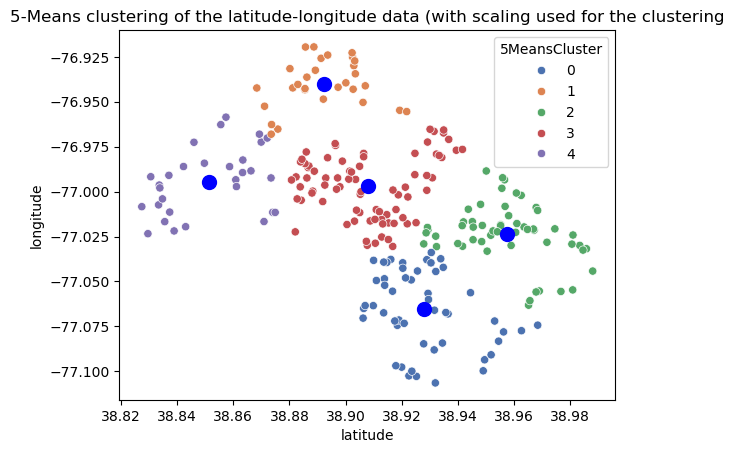

In [55]:
sns.scatterplot(data = X, x = "latitude", y = "longitude", hue = "5MeansCluster", palette="deep")
plt.scatter(x = centroids5[:,0], y = centroids5[:,1], color='blue', s = 100)
plt.title("5-Means clustering of the latitude-longitude data (with scaling used for the clustering")
plt.show()

3. Apply Agglomerative clustering to the dataset. Draw the Dendrogram and use it to find the best (or a sensible) number of clusters.

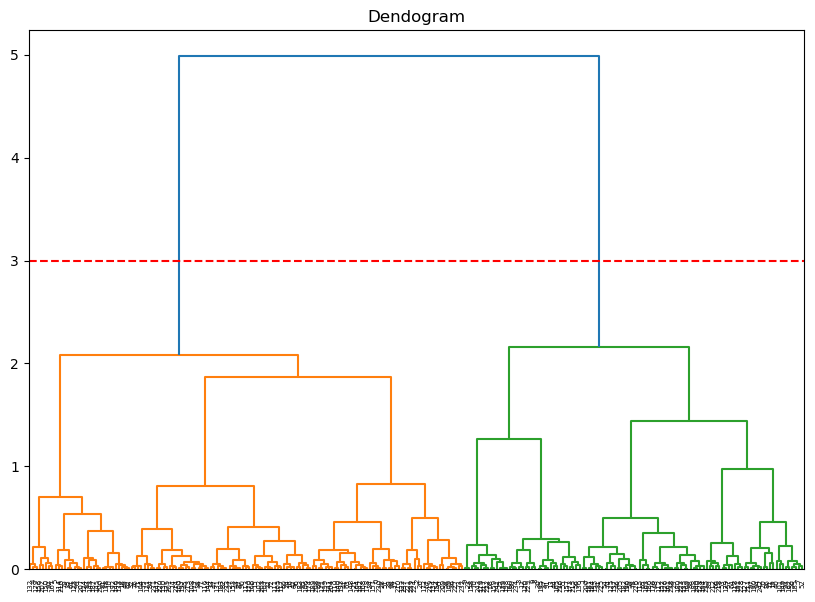

In [56]:
plt.figure(figsize=(10, 7))
plt.title("Dendogram")
dend = shc.dendrogram(shc.linkage(X_scaled_mm, method='ward'))
plt.axhline(y=3, color='r', linestyle='--')
plt.show()

Optimal clusters = 2

We no build the agglomerative clustering model:

In [57]:
aggClustering = AgglomerativeClustering(n_clusters=2)
aggClustering.fit(X_scaled_mm)

AgglomerativeClustering()

4. Generate this number of clusters with Agglomerative clustering and visualize the clustering.

In [58]:
X["2aggCluster"] = aggClustering.labels_
X["2aggCluster"]

0      1
1      0
2      1
3      0
4      1
      ..
239    1
240    0
241    0
242    0
243    0
Name: 2aggCluster, Length: 244, dtype: int64

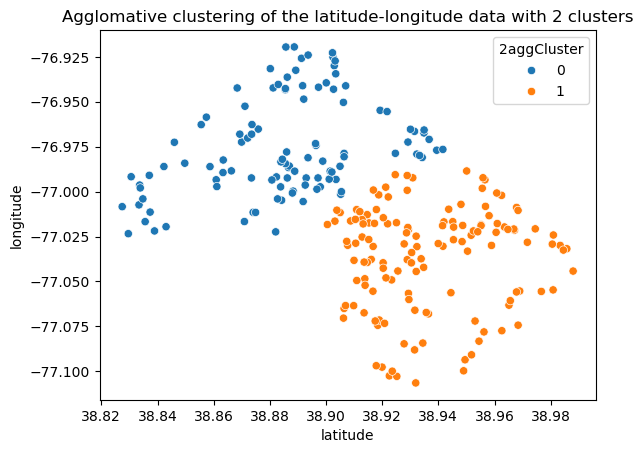

In [59]:
sns.scatterplot(data = X, x = "latitude", y = "longitude", hue = "2aggCluster")
plt.title("Agglomative clustering of the latitude-longitude data with 2 clusters")
plt.show()

5. Apply DBSCAN clustering to the dataset. Try out different values for "eps" and "min_samples" and choose the best values. (Hint: For "eps" you probably have to try out values around 0.01.)

We first try with default parameters, for the clusters:
* eps=0.5
* min_samples=5

In [60]:
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled_mm)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Here we see an interesting problem. The data is quite dense, and the result of using the default parameters is that everything becomes one big cluster (without any outliers). 

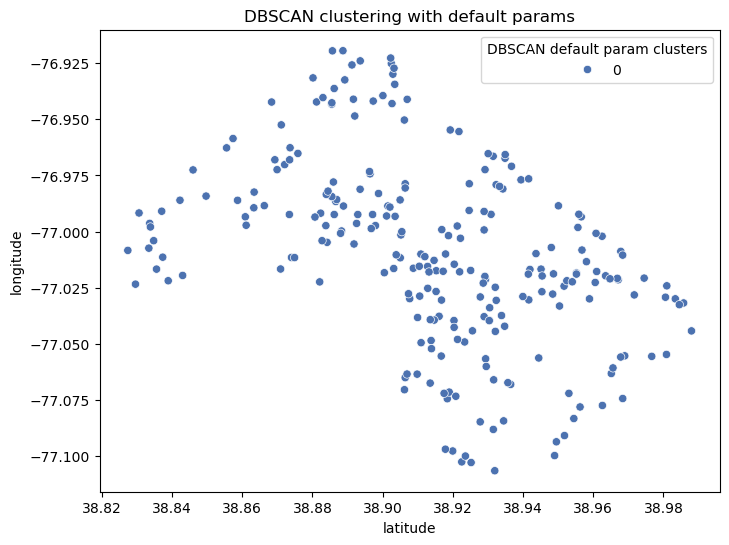

In [61]:
X["DBSCAN default param clusters"] = dbscan.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data = X, x = "latitude", y = "longitude", hue = "DBSCAN default param clusters", palette="deep")
plt.title("DBSCAN clustering with default params")
plt.show()

C:\Users\Jacob\AppData\Local\Temp\ipykernel_17032\3461588772.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 5))


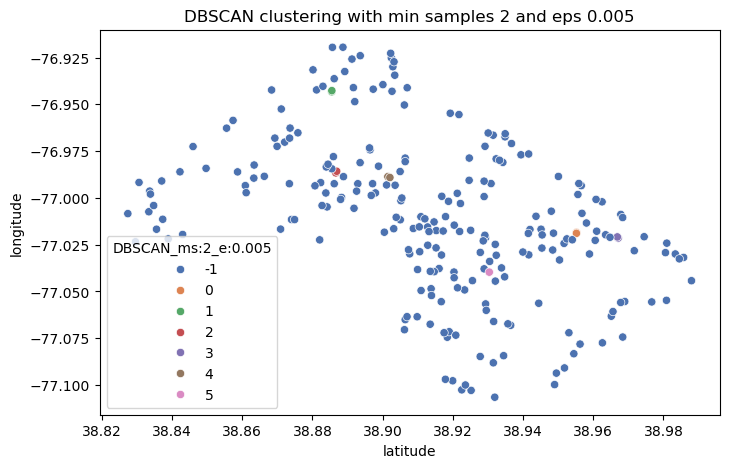

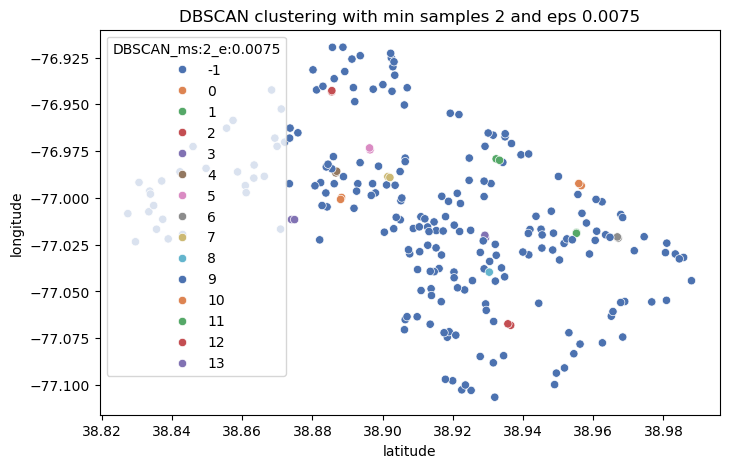

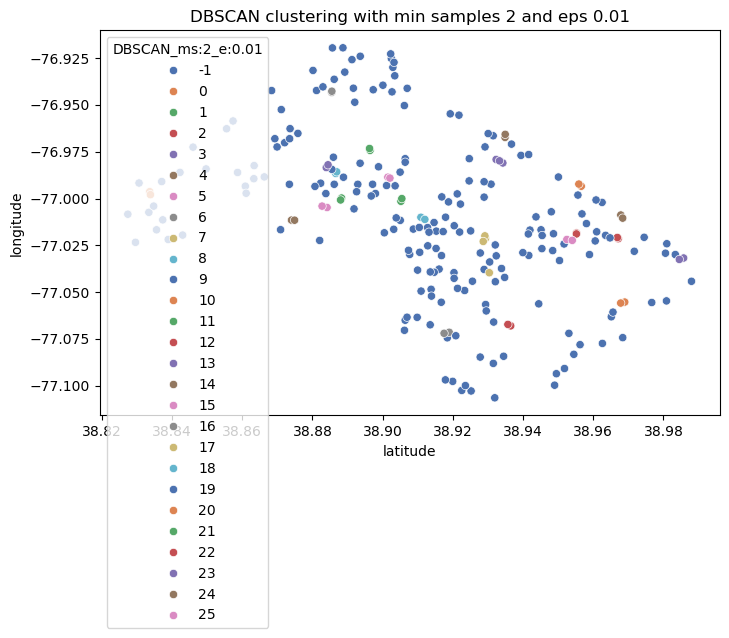

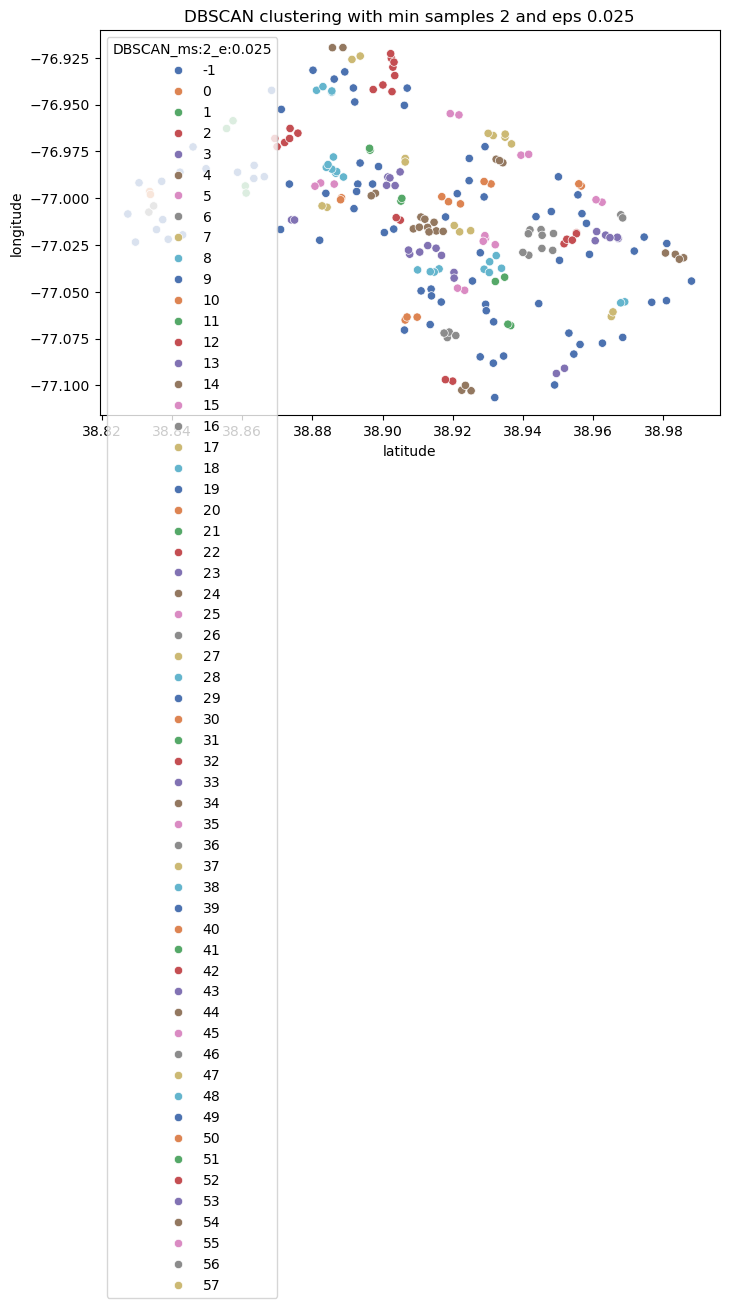

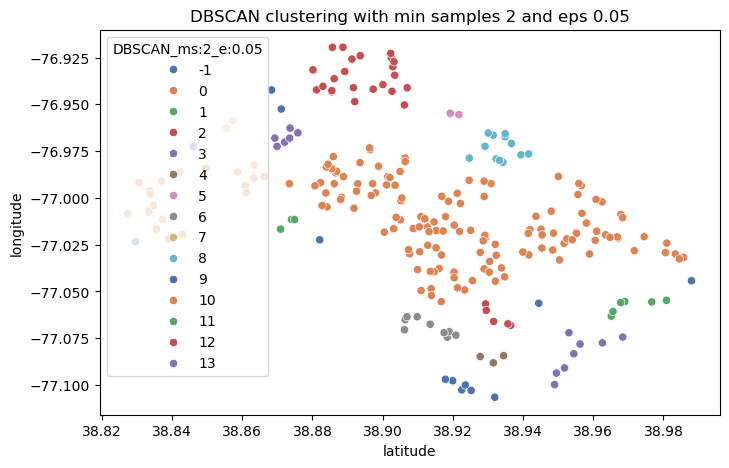

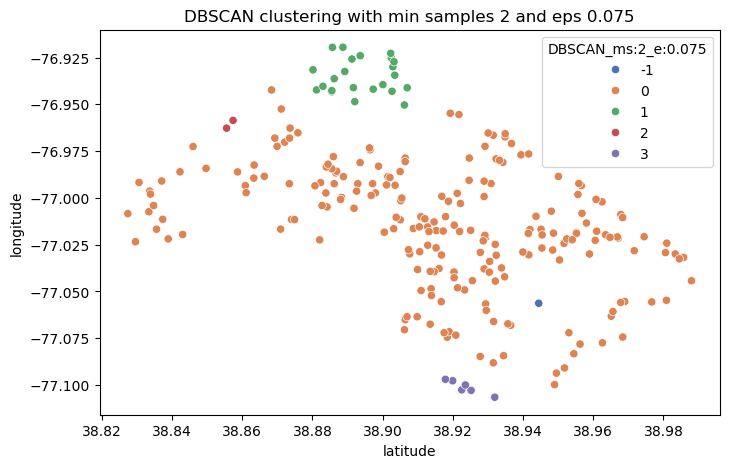

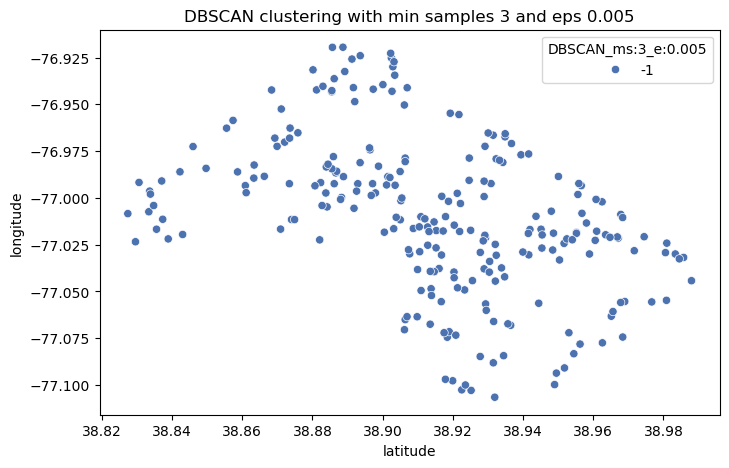

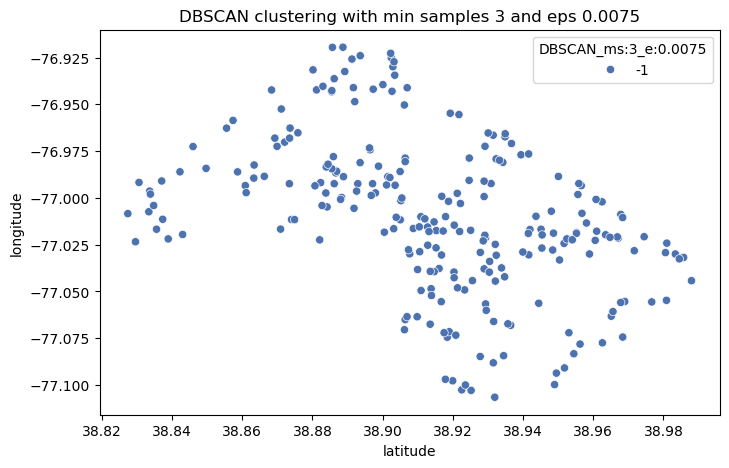

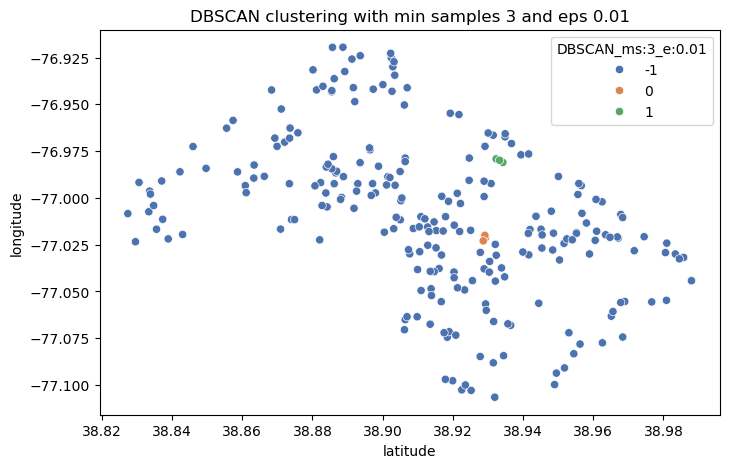

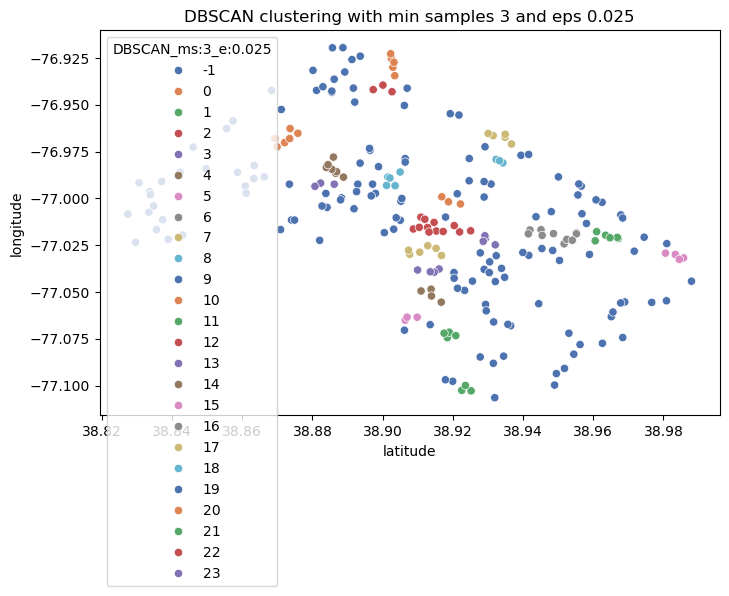

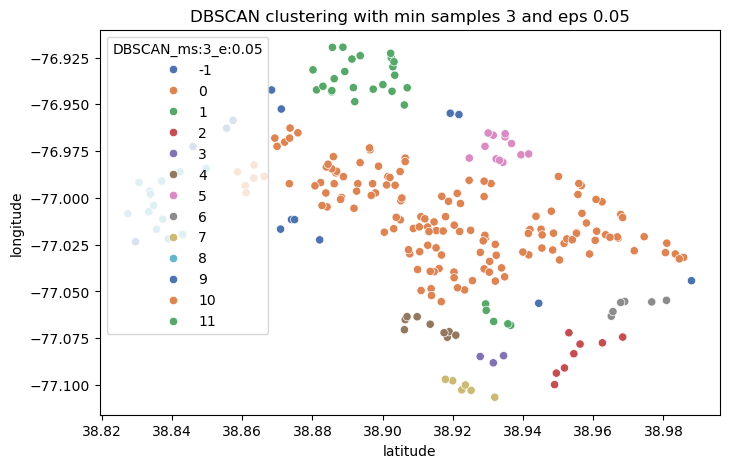

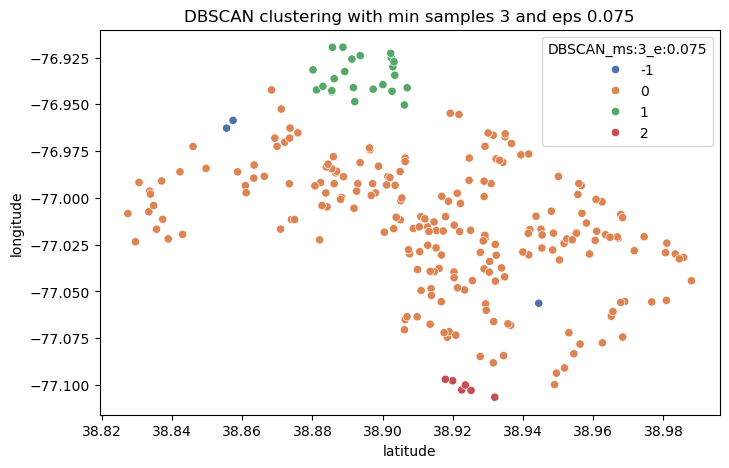

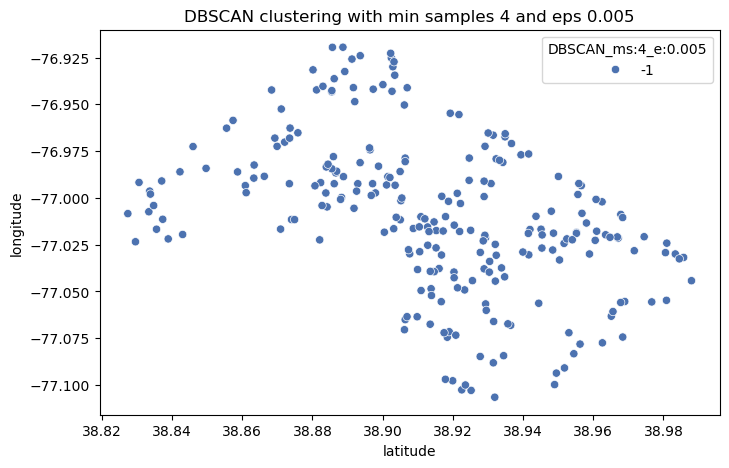

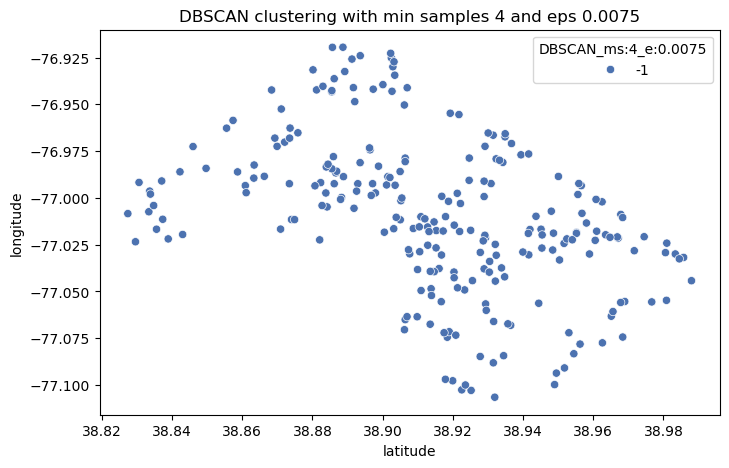

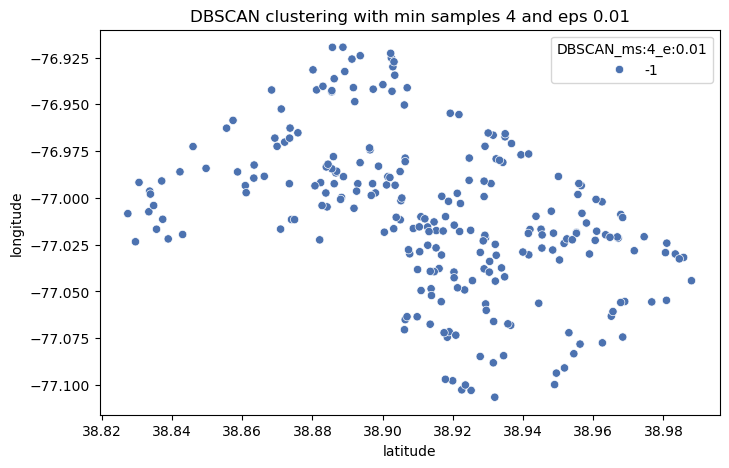

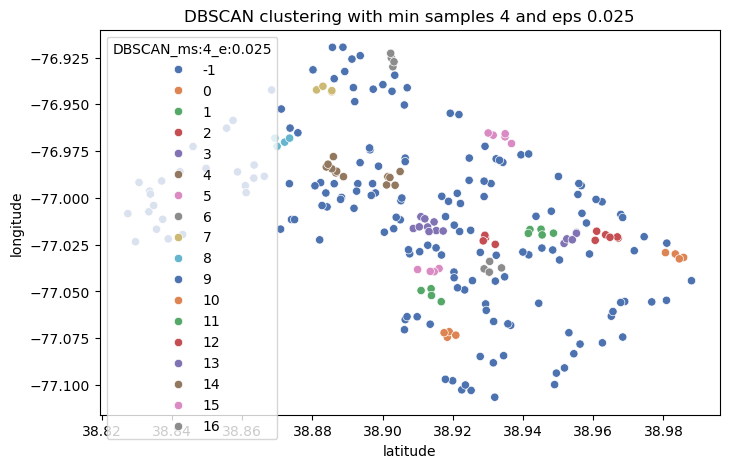

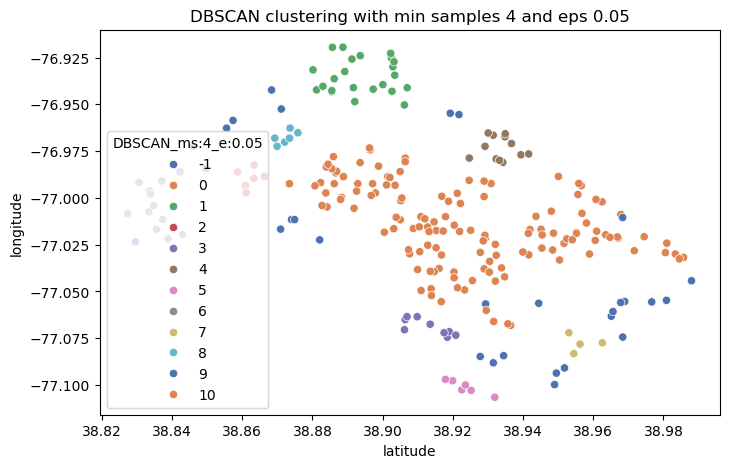

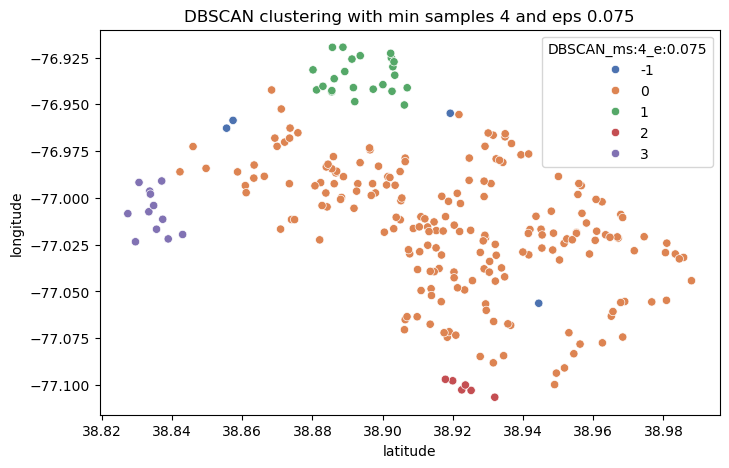

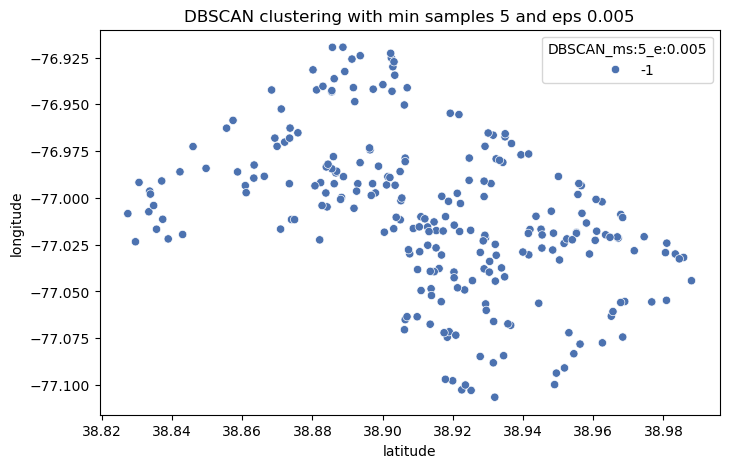

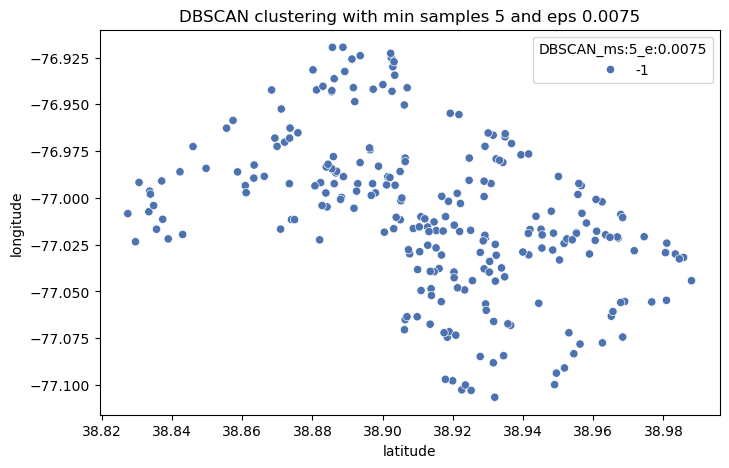

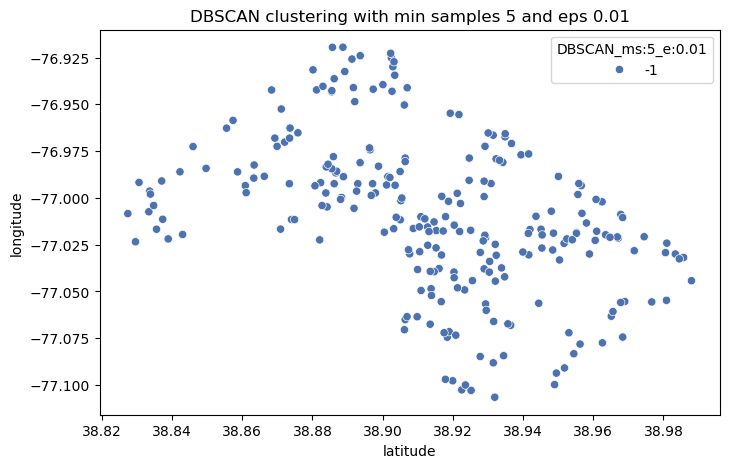

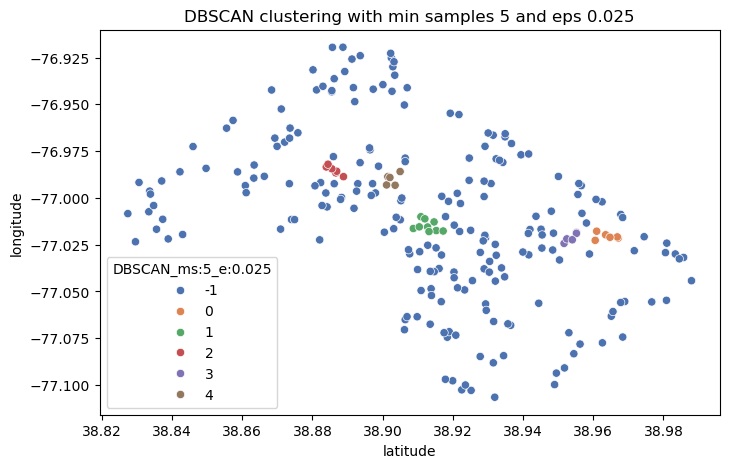

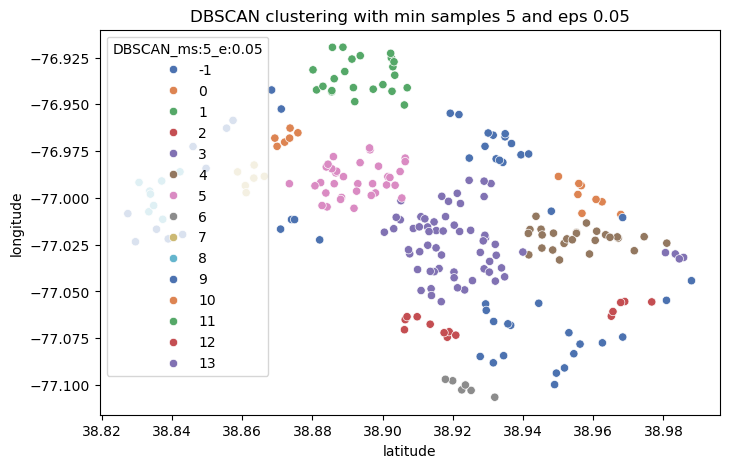

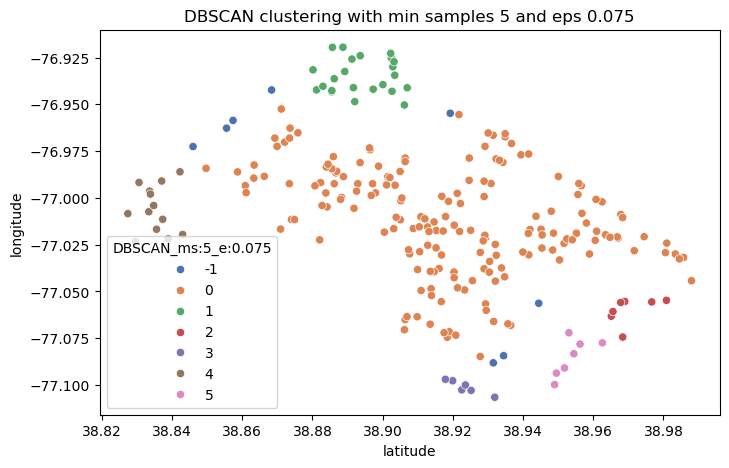

In [62]:
minSamples = [2, 3 ,4, 5]
eps = [0.0050, 0.0075, 0.01, 0.025, 0.05, 0.075]
for ms in minSamples:
    for e in eps:
        dbscan = DBSCAN(min_samples = ms, eps = e)
        clusters = dbscan.fit_predict(X_scaled_mm) 
        X["DBSCAN_ms:{0}_e:{1}".format(ms, e)] = dbscan.labels_
        plt.figure(figsize=(8, 5))
        sns.scatterplot(data = X, x = "latitude", y = "longitude", hue = "DBSCAN_ms:{0}_e:{1}".format(ms, e), palette="deep")
        plt.title("DBSCAN clustering with min samples {0} and eps {1}".format(ms, e))
plt.show()
        

6. Visual the final DBSCAN clustering you decided upon in 5.

Pincking eps=0.074 and min_samples=4, seems to give us as clustering with more distinct clusters, and with very little outliers. From the above graphs we see how when min_samples is fixed, a larger eps gives us more core points, resulting in fewer border points, and less outliers. It also gives us less clusters. 

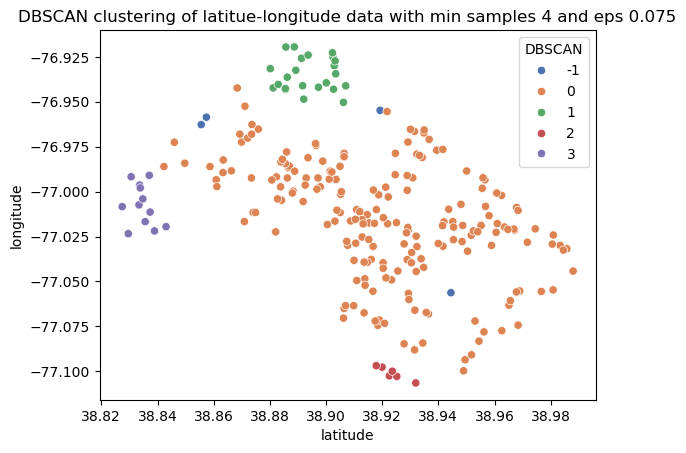

In [63]:
dbscan = DBSCAN(eps=0.075, min_samples=4)
X["DBSCAN"] = dbscan.fit_predict(X_scaled_mm)  

sns.scatterplot(data = X, x = "latitude", y = "longitude", hue = "DBSCAN", palette="deep")
plt.title("DBSCAN clustering of latitue-longitude data with min samples 4 and eps 0.075")
plt.show()

7. Calculate the Silhouette scores for the three different "best clustering" you found with the three different methods. Also use Adjusted Rand Index to compare the best ones to each other.

Below we have the 3 selected clusters, from the respective clustering methods:

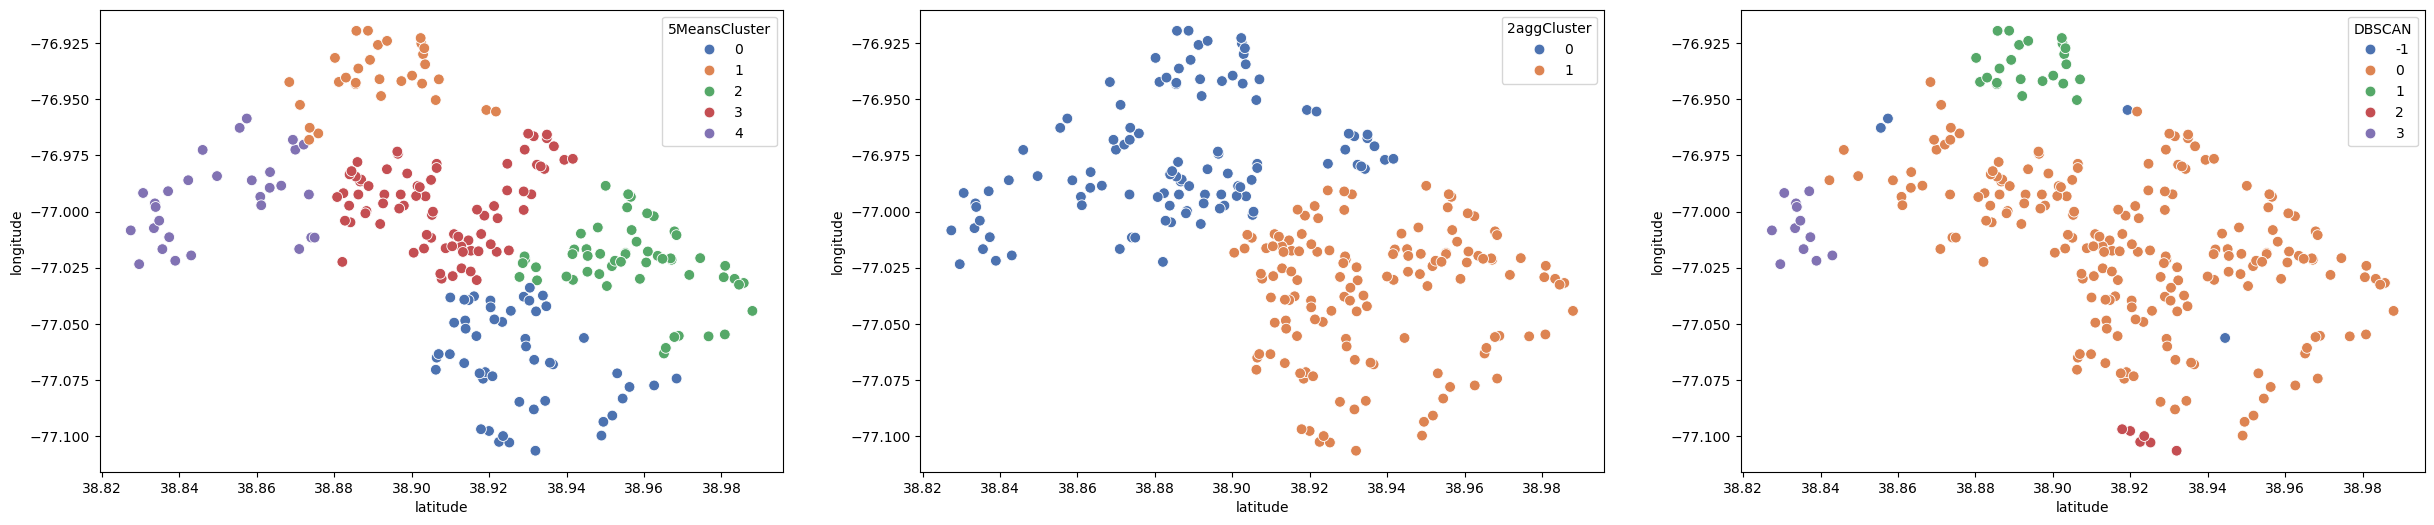

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(30, 6))
sns.scatterplot(data = X, x = "latitude", y = "longitude", hue = "5MeansCluster", s=60, ax=axes[0], palette="deep")
sns.scatterplot(data = X, x = "latitude", y = "longitude", hue = "2aggCluster", s=60, ax=axes[1],palette="deep")
sns.scatterplot(data = X, x = "latitude", y = "longitude", hue = "DBSCAN", s=60, ax=axes[2],palette="deep")
plt.show()

Starting with Silhouette scores (measuring how well-seperated clusters are based on distance):

In [65]:
SilScore_df = pd.DataFrame({"Clustering method": ["5MeansCluster", "2aggCluster", "DBSCAN"], 
                       "Silhouette Score": [silhouette_score(X=X_scaled_mm, labels=X["5MeansCluster"]),
                                            silhouette_score(X=X_scaled_mm, labels=X["2aggCluster"]),
                                            silhouette_score(X=X_scaled_mm, labels=X["DBSCAN"])]})
SilScore_df

,Clustering method,Silhouette Score
0,5MeansCluster,0.414635
1,2aggCluster,0.448892
2,DBSCAN,0.141096


The silhoutte score uses the following formula: Silhouette Score = (b — a) / max(a, b) 
a (intra-cluster distance) = The average distance (for each datapoint) to all other points in the same cluster (cohesive, aka how close each point are to each other. How similar they are with each other)
b (inter-cluster distance) = The average distance (for each datapoint) to all other clusters the datapoint doesn't belong to. (Distinctive, aka how far appart datapoints within clusters are to other datapoints in other clusters. How much they differ from datapoints in other clusters) 

The above (overall) silhoutte score = The mean value of each calculated silhoutte score

The score ranges from -1 to +1.
Positive = indication of data points belonging to the right clusters
Negative = indication incorrect assignment to clusters
0 score = overlapping/datapoints close to multiple clusters

For 5MeansCluster and 2AggCluster we see that both have quite close results. While not the best, the respective silhouette scores indicate that the clusters have a somewhat distinctive inter-cluster similarity, and that the intra-cluster similarity is quite cohesive (close to each other)

Finally the DBScan score is much worse. However, we must also take the nature of DBscan into account. The silhoutte score is a distance based measures, where as DBScan is not strictly distance based. That is DBScan also cluster based on density: how many neighbors there are and how dense the neighborhood is   

We now compare with the Adjusted Rand Index (measures agreement between two clustering results):

The optimal scenario would have been, that we had a groundtruth for the clusterings. Since that is not the case, Adjusted Rand Index simply tells us how similar two clusterings are compared to what we would expect from random chance.

A (perfect) score of 1 = Perfect clustering, both clusterings agree completely (identical)
A score of 0 = Agreement is no better than random (no meaningful structure)
A score of -1 = Agreement is worse than random (completely opposite clusters, clusters are systematically incorrect)


In [66]:
ARI_df = pd.DataFrame({
    "Clustering method": ["5MeansCluster", "5MeansCluster", "2aggCluster"],
    "Comparative clustering method": ["2aggCluster", "DBSCAN", "DBSCAN"],
    "Adjusted Rand Score": [
        adjusted_rand_score(X["5MeansCluster"], X["2aggCluster"]),
        adjusted_rand_score(X["5MeansCluster"], X["DBSCAN"]),
        adjusted_rand_score(X["2aggCluster"], X["DBSCAN"]),
    ]
})

# Display the ARI DataFrame
ARI_df


,Clustering method,Comparative clustering method,Adjusted Rand Score
0,5MeansCluster,2aggCluster,0.244249
1,5MeansCluster,DBSCAN,0.159490
2,2aggCluster,DBSCAN,0.126870


Based on the above Adjusted Rand Scores we can tell, that 5MeansCluster and 2aggCluster have the highest agreement. They produce results more close to each other, compared to DBSCAN. While 5MeansCluster and 2aggCluster are closer, it is by no means a perfect score. They still produce quite different results.

The big difference in DBScan can be explained in its nature. It is density based, and in our case it produces clusters very differently than the other 2 methods 